In [96]:

import numpy as np
import matplotlib.pyplot as plt
import gstools as gs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
import pandas as pd



In [97]:
# dimensionxy=50
# x = np.linspace(0, 50, 50)
# y = np.linspace(0, 50, 50)
# XX, YY = np.meshgrid(x, y)


# model = gs.Gaussian(dim=2, var=1,len_scale=6)
dimensionxy=25

# 生成数据
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)

# 第一个数据
model = gs.Gaussian(dim=2, var=1, len_scale=3)
srf = gs.SRF(model,mean=0.)
srf((x, y), mesh_type='structured')
B0=srf((x, y), mesh_type='structured',seed=100)




In [ ]:
# 定义状态数
n_states = 5
est = KBinsDiscretizer(n_bins=n_states, encode='ordinal', strategy='uniform')
B_discretized = est.fit_transform(B0)

def process_data_with_randomness(B_discretized):
    # 构建转移概率矩阵
    transition_matrix = np.zeros((n_states, n_states))

    for month in range(24):  # 24次状态转移
        for day in range(25):
            current_state = int(B_discretized[month, day])
            next_state = int(B_discretized[month + 1, day])
            transition_matrix[current_state, next_state] += 1

    # 归一化转移概率矩阵
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    # 使用马尔可夫链预测第26个月的状态
    last_month_states = B_discretized[-1, :]
    predicted_states = []

    for state in last_month_states:
        predicted_state = np.random.choice(np.arange(n_states), p=transition_matrix[int(state)])
        predicted_states.append(predicted_state)

    print(predicted_states)
    return predicted_states
    # 预测值从状态返回到实际值范围
    # B26_pred = est.inverse_transform([predicted_states])
    # # 将 B26_pred 的数据格式调整为适合 KMeans 聚类的格式
    # B26_pred = B26_pred.flatten().reshape(-1, 1)

    # return B26_pred.flatten()

def calcuCirculation(time,objectCal):
    all_processed_values=[]
    results_df= pd.DataFrame()

    if time==1:
        for i in range(1, time):
            processed_values = process_data_with_randomness(objectCal)
            all_processed_values.append(pd.Series(processed_values, name=f'Out0'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("initial-out/pred_nonoisy_initial.csv", index=False)
    else:
        for i in range(1, time):
            processed_values = process_data_with_randomness(objectCal)
            all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("repro-out/pred_nonoisy.csv", index=False)
        # 检查结果
        print(results_df)


times=1001
calcuCirculation(1)
calcuCirculation(times)



In [98]:
# 定义状态数
n_states = 5
est = KBinsDiscretizer(n_bins=n_states, encode='ordinal', strategy='uniform')
B_discretized = est.fit_transform(B0)

def process_data_with_randomness(B_discretized):
    # 构建转移概率矩阵
    transition_matrix = np.zeros((n_states, n_states))

    for month in range(24):  # 24次状态转移
        for day in range(25):
            current_state = int(B_discretized[month, day])
            next_state = int(B_discretized[month + 1, day])
            transition_matrix[current_state, next_state] += 1

    # 归一化转移概率矩阵
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    # 使用马尔可夫链预测第26个月的状态
    last_month_states = B_discretized[-1, :]
    predicted_states = []

    for state in last_month_states:
        predicted_state = np.random.choice(np.arange(n_states), p=transition_matrix[int(state)])
        predicted_states.append(predicted_state)

    # print(predicted_states)
    # return predicted_states
    # 预测值从状态返回到实际值范围
    B26_pred = est.inverse_transform([predicted_states])
    # 将 B26_pred 的数据格式调整为适合 KMeans 聚类的格式
    B26_pred = B26_pred.flatten().reshape(-1, 1)

    # 使用 KMeans 进行聚类，分成 5 类
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(B26_pred)
    # 可视化聚类结果
    # 获取聚类标签和聚类中心
    labels = kmeans.labels_
    # centers = kmeans.cluster_centers_
    # plt.figure(figsize=(12, 8))
    # plt.scatter(np.arange(1, 26), B26_pred, c=labels, cmap='viridis', s=100, marker='o', label='Predicted Values')
    # plt.scatter(np.arange(1, 26), centers[labels], c='red', s=100, marker='x', label='Cluster Centers')

    # plt.xlabel('Day of the Month', fontsize=14, labelpad=10)
    # plt.ylabel('Predicted Value', fontsize=14, labelpad=10)
    # plt.title('Clustering of Predicted Values for the 26th Month', fontsize=16, pad=20, fontweight='bold')
    # plt.grid(True, linestyle='--', alpha=0.7)
    # plt.xticks(np.arange(1, 26), fontsize=12)
    # plt.yticks(fontsize=12)
    # plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, borderpad=1)
    # plt.tight_layout()
    # plt.show()
    # print(B26_pred.flatten())

    return labels,B26_pred.flatten()

all_processed_values=[]

for i in range(1, 2):
    processed_values,value = process_data_with_randomness(B_discretized)
    all_processed_values.append(pd.Series(processed_values, name=f'Out0'))
    all_processed_values.append(pd.Series(value, name=f'value0'))

results_df_initial = pd.DataFrame()
# 将所有列一次性连接到 results_df 中
results_df_initial = pd.concat(all_processed_values, axis=1)
results_df_initial.to_csv("initial-out/pred_nonoisy_initial.csv", index=False)
print(results_df_initial)
# 检查结果

all_processed_values=[]
value=[]
# 运行过程 1000 次并存储结果
times=1001
for i in range(1, times):
    print(i)
    processed_values,value = process_data_with_randomness(B_discretized)
    all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))
    all_processed_values.append(pd.Series(value, name=f'value{i}'))

# Initialize the dataframe to store results
results_df = pd.DataFrame()
# 将所有列一次性连接到 results_df 中
results_df = pd.concat(all_processed_values, axis=1)
results_df.to_csv("repro-out/pred_nonoisy.csv", index=False)
# 检查结果
print(results_df)

    Out0    value0
0      2  0.799792
1      3 -0.172528
2      3 -0.133069
3      2  0.915437
4      4  1.112985
5      1  0.515354
6      0 -0.703104
7      0 -1.349441
8      0 -1.089022
9      0 -0.884255
10     3 -0.104441
11     1  0.442597
12     2  1.006121
13     1  0.512675
14     3 -0.043627
15     1  0.300598
16     1  0.294219
17     1  0.175016
18     3  0.006417
19     0 -0.784371
20     0 -0.948075
21     1  0.429970
22     2  0.802675
23     4  1.228292
24     2  1.012259
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
15

In [99]:

df = pd.read_csv("./repro-out/pred_nonoisy.csv")

df2=pd.read_csv("./initial-out/pred_nonoisy_initial.csv")

out0 = df["Out0"]=df2["Out0"]
df["value0"]=df2["value0"]
x= df.index
data = df.copy()
            

In [100]:
import pandas as pd

# 定义属性模板
attributes_template = ["value"]
results_df = pd.DataFrame()

# 计算特定聚类的质心的函数
def calculate_centroids_with_attrs(data, clustering_col, attributes):
    centroids = {}
    for cluster_id in range(5):
        cluster_data = data[data[clustering_col] == cluster_id]
        if not cluster_data.empty:
            print(cluster_data[attributes].mean())
            centroid = cluster_data[attributes].mean()  # 直接存储标量值
            centroids[cluster_id] = centroid
    return centroids

def calculate_row(data, cluster_col, attributes, row_name, df):
    centroids = calculate_centroids_with_attrs(data, cluster_col, attributes)
    
    # 提取质心值并构建一个数据框
    centroids_df = pd.DataFrame(centroids, index=[row_name])
    
    # 按照属性进行排序
    centroids_df = centroids_df.T.sort_values(by=row_name)
    # print("centroids_df", centroids_df)
    
    # 重新分配新的聚类标签
    sorted_clusters = centroids_df.index.tolist()
    # print("sorted_clusters", sorted_clusters)
    cluster_mapping = {original_cluster: new_cluster for new_cluster, original_cluster in enumerate(sorted_clusters, start=1)}
    # print("cluster_mapping", cluster_mapping)
    data[f'new_{cluster_col}'] = data[cluster_col].map(cluster_mapping)
    
    # 重新计算新的聚类质心
    new_centroids = calculate_centroids_with_attrs(data, f'new_{cluster_col}', attributes)
    new_centroids_df = pd.DataFrame(new_centroids, index=[row_name])
    
    # 检查空值
    # print(f"new_{cluster_col} column null values:", data[f'new_{cluster_col}'].isnull().sum())
    # print(f"new_centroids_df null values:", new_centroids_df[row_name].isnull().sum())
    
    print("name",new_centroids_df)
    # 将排序后的结果添加到结果数据框中
    df[row_name] = new_centroids_df.loc[row_name].values

    return data, df


# 假设数据集已定义
# data = ...

# 计算每个复现聚类结果的质心
for i in range(times):
    cluster_col = f'Out{i}'
    attributes = attributes_template
    data_repro, results_df = calculate_row(data, cluster_col, f'value{i}', f'Out{i}', results_df)

print(data_repro)
data_repro.to_csv('repro-out/filtered_data.csv')

-0.9597113474011808
0.38148989899219565
0.9072570692934334
-0.0894498512117831
1.1706384312052316
-0.9597113474011808
-0.0894498512117831
0.38148989899219565
0.9072570692934334
name              1        2        3         4
Out0 -0.959711 -0.08945  0.38149  0.907257
-0.42828134651810973
0.8360141611732036
-1.249788553574275
0.4227574478999186
1.1250656327277797
-1.249788553574275
-0.42828134651810973
0.4227574478999186
0.8360141611732036
name              1         2         3         4
Out1 -1.249789 -0.428281  0.422757  0.836014
-0.35368330515757995
0.9552808643526218
-0.7664544135833014
0.0844526694056211
0.4231899592506296
-0.7664544135833014
-0.35368330515757995
0.0844526694056211
0.4231899592506296
name              1         2         3        4
Out2 -0.766454 -0.353683  0.084453  0.42319
0.33484309013818014
-0.7268876466952303
0.8891664723926139
1.5849802033657503
-0.10060662517210854
-0.7268876466952303
-0.10060662517210854
0.33484309013818014
0.8891664723926139
name         

In [101]:
# 筛选data_repro中包含新列的部分
filtered_data_repro = data[[f'new_Out{i}' for i in range(1, times)]]

# 计算每一行的cluster数及出现的频率
cluster_counts = filtered_data_repro.apply(pd.Series.value_counts, axis=1).fillna(0)
cluster_frequencies = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# new_pred_cols = [f'new_pred{i}' for i in range(1, 1001)]
# filtered_data_repro['clusters_array'] = filtered_data_repro[new_pred_cols].apply(lambda row: row.unique(), axis=1)


filtered_data_repro.to_csv('repro-out/filtered_data_repro.csv')
# print(filtered_data_repro)

filtered_data_initial = data[[f'new_Out0']]
print(filtered_data_initial)

    new_Out0
0          4
1          2
2          2
3          4
4          5
5          3
6          1
7          1
8          1
9          1
10         2
11         3
12         4
13         3
14         2
15         3
16         3
17         3
18         2
19         1
20         1
21         3
22         4
23         5
24         4


In [102]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('repro-out/filtered_data.csv')

relative_frequency=[]

# 创建频率分布图的函数
def plot_histogram(row_data, row_index):
    initial_value=filtered_data_initial.loc[row_index,:].values[0]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    # print(frequencies)
    
    categories = [1, 2, 3, 4,5]
    frequency_values = [frequencies.get(category, 0) for category in categories]
    print(frequency_values)
    # 确定initial_value所在的类别及其频率
    initial_category = int(initial_value)
    initial_frequency = frequencies.get(initial_category, 0)
    relative_frequency.append(initial_frequency / len(row_data)) 
    # print(initial_relative_frequency)

    # plt.figure(figsize=(10, 6))
    # plt.bar(categories, frequency_values, tick_label=categories,alpha=0.3,label="Reproduced values")
    # plt.title(f'Frequency Distribution of Row {row_index} \n The probability of reproducbility is {initial_frequency / len(row_data) *100}%')
    # plt.axvline(x=initial_category, color='red', linestyle='dashed', linewidth=2, label=f'Initial value: {initial_value}')
    # plt.legend()
    # plt.xlabel('Category')
    # plt.ylabel('Frequency')
    # plt.ylim(0, max(frequency_values) + 10)  # Adjust ylim for better visualization
    # plt.show()

# 为每一行绘制直方图 filtered_data_repro.shape[0]
# print(filtered_data_repro.loc[0,:])
data2 = pd.read_csv('repro-out/filtered_data_repro.csv')
# filtered_data_repro= data2.iloc[:,1:1001]
# print(filtered_data_repro)
for i in range(1,filtered_data_repro.shape[0]):
    plot_histogram(filtered_data_repro.loc[i,:], i)

# 计算initial_relative_frequency数组的期望（均值）
expected_value = np.mean(relative_frequency)
print("Expected Value of Initial Relative Frequencies:", expected_value)


[1, 48, 156, 304, 491]
[0, 54, 162, 460, 324]
[0, 16, 149, 390, 445]
[27, 164, 266, 187, 356]
[145, 341, 290, 158, 66]
[603, 286, 100, 11, 0]
[735, 232, 33, 0, 0]
[822, 154, 16, 8, 0]
[241, 365, 225, 124, 45]
[31, 179, 304, 188, 298]
[13, 156, 327, 213, 291]
[13, 253, 360, 304, 70]
[44, 314, 387, 199, 56]
[115, 371, 338, 143, 33]
[73, 235, 256, 318, 118]
[1, 55, 157, 511, 276]
[2, 64, 204, 516, 214]
[147, 332, 346, 173, 2]
[338, 445, 194, 23, 0]
[462, 494, 42, 2, 0]
[149, 334, 363, 154, 0]
[9, 78, 163, 482, 268]
[2, 58, 66, 152, 722]
[34, 45, 165, 181, 575]
Expected Value of Initial Relative Frequencies: 0.3585


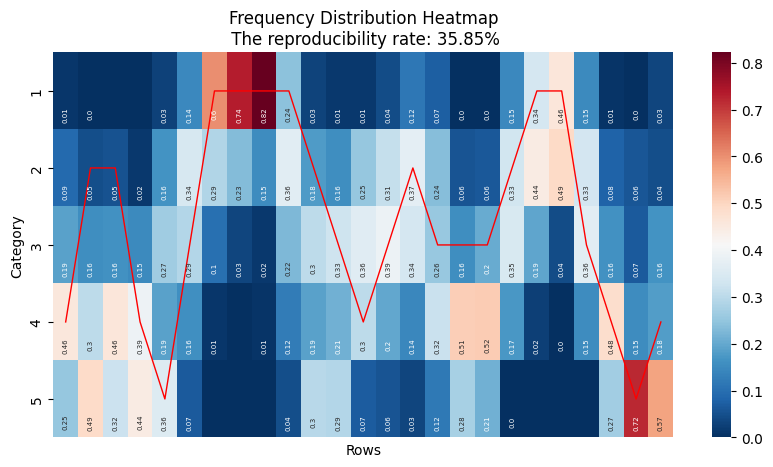

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 仅选择前20行的数据
number = filtered_data_repro.shape[0]
repro = filtered_data_repro.iloc[:number, :]
initial = filtered_data_initial.iloc[:number, :]
# repro = filtered_data_repro
# initial = filtered_data_initial

# 创建一个矩阵来存储频率分布
frequency_matrix = np.zeros((repro.shape[0], 5))

# 填充频率矩阵
for i in range(repro.shape[0]):
    row_data = repro.loc[i, :]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    for category in [1, 2, 3, 4,5]:
        frequency_matrix[i, category - 1] = frequencies.get(category, 0) / len(row_data)

# 创建一个矩阵来存储注释（只显示值大于0的标签）
annotations = np.where(frequency_matrix > 0, np.round(frequency_matrix, 2), '')

# 绘制热力图
plt.figure(figsize=(10, 5))

ax = sns.heatmap(frequency_matrix.T, annot=annotations.T, fmt="", xticklabels=False, yticklabels=[1, 2, 3, 4,5], cmap="RdBu_r", cbar=True,
                 annot_kws={"size": 5, "ha": "center", "va": "center", "rotation": 90,"clip_on": True}) #cmap="viridis"

plt.title(f'Frequency Distribution Heatmap\n The reproducibility rate: {round(expected_value*100,4)}%')
plt.ylabel('Category')
plt.xlabel('Rows')

# 调整标签的位置
for text in ax.texts:
    text.set_y(float(text.get_position()[1]) + 0.3)

# 添加表示filtered_data_initial的线
initial_values = initial['new_Out0'].values - 1  # 将值转换为索引
plt.plot(np.arange(0.5, repro.shape[0] + 0.5), initial_values + 0.5, color='red', linewidth=1, label='Initial Value')
plt.savefig("repro-out/heatmap.svg")
plt.show()


计算 ARI 统计量:
原始结果与复现结果之间的ARI 95%置信区间: (-0.017991512067186327, 0.28291168013152784);随机误差范围: (-0.03666887036563585, 0.3038004986461589)
ARI置信区间覆盖率: 0.32；概率0.9466


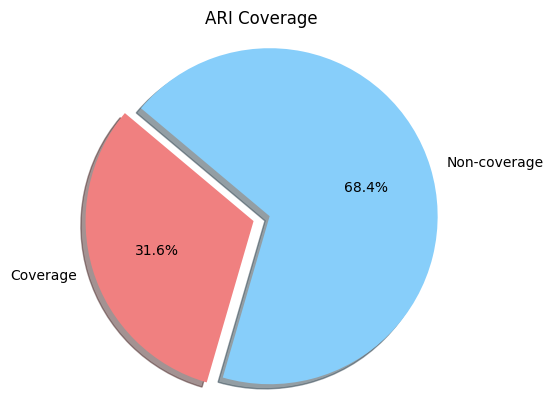


计算 NMI 统计量:
原始结果与复现结果之间的NMI 95%置信区间: (0.24451188565626564, 0.5205151982404588);随机误差范围: (0.2171226049848991, 0.5200333863166224)
NMI置信区间覆盖率: 0.36；概率0.9342


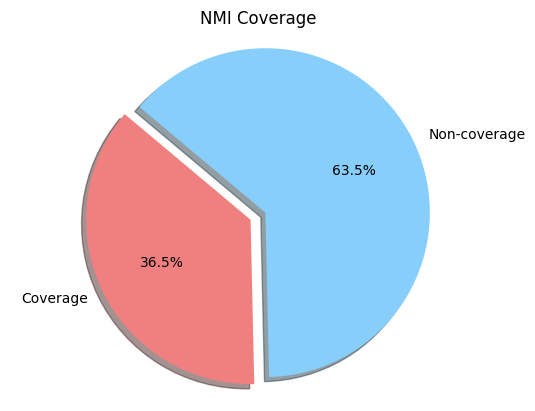


计算 Kappa 统计量:
原始结果与复现结果之间的Kappa 95%置信区间: (-0.02946232520513128, 0.47818739005087363);随机误差范围: (-0.04761904761904767, 0.48024948024948033)
Kappa置信区间覆盖率: 0.50；概率0.9627


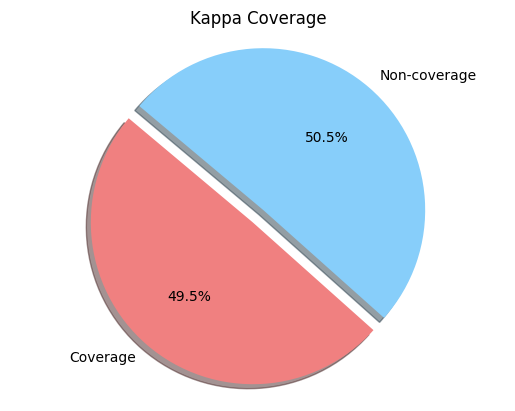

In [104]:
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, cohen_kappa_score
from itertools import combinations
import scipy.stats as stats

# 设定随机种子以确保结果一致


# 计算置信区间
def calculate_confidence_interval(values, alpha=0.05):
    values = np.sort(values)
    lower_bound = np.percentile(values, alpha / 2 * 100)
    upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

# 蒙特卡洛抽样并计算指定类型的统计量
def monteCarloMethod(num_samples, data, stat_type):
    monteCarlo_statistics_values = []
    sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    
    for comb in sampled_combinations:
        i, j = comb
        monteCarlo_statistics_values.append(calculate_statistic_values(data[i], data[j], stat_type))
    
    return monteCarlo_statistics_values



# 计算指定类型的统计量
def calculate_statistic_values(data1, data2, stat_type):
    if stat_type == "ARI":
        return adjusted_rand_score(data1, data2)
    elif stat_type == "NMI":
        return normalized_mutual_info_score(data1, data2)
    elif stat_type == "Kappa":
        return cohen_kappa_score(data1, data2)

# 计算覆盖率
def calculate_coverage(interval1, interval2):
    L1, U1 = interval1
    L2, U2 = interval2
    L_overlap = max(L1, L2)
    U_overlap = min(U1, U2)
    if L_overlap > U_overlap:
        return 0.0
    overlap_length = U_overlap - L_overlap
    length1 = U1 - L1
    coverage = overlap_length / length1
    return coverage
# def calculate_proportion(values, lower_bound, upper_bound):
#     # value
#     return np.sum((values >= lower_bound) & (values <= upper_bound)) / len(values)
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保 values 是一个一维数组或列表
    values = np.asarray(values).flatten()
    
    common_count = 0
    total_count = len(values)
    for value in values:
        if lower_bound <= value <= upper_bound:
            common_count += 1
            
    return common_count / total_count

# 数据加载
data_df = pd.read_csv('repro-out/filtered_data.csv')
filtered_data_repro = data_df[[f'new_Out{i}' for i in range(1, 1001)]]
out0 = data_df['new_Out0']

# 定义要计算的统计量类型
stat_types = ["ARI", "NMI", "Kappa"]  # 可选值："ARI", "NMI", "Kappa"



for stat_type in stat_types:
    print(f"\n计算 {stat_type} 统计量:") 
    # 计算原始结果与复现结果的指定统计量
    real_values = [calculate_statistic_values(out0, filtered_data_repro[f'new_Out{i}'], stat_type) for i in range(1, 1001)]
    # 计算置信区间-----总误差
    ci_low, ci_high = calculate_confidence_interval(real_values)
    # -----随机误差
    monteCarlo_values = monteCarloMethod(10000, filtered_data_repro, stat_type)
    ci_low_mc_random, ci_high_mc_random = calculate_confidence_interval(monteCarlo_values)
    print(f"原始结果与复现结果之间的{stat_type} 95%置信区间: ({ci_low}, {ci_high});随机误差范围: ({ci_low_mc_random}, {ci_high_mc_random})")
    # 计算覆盖率

    ratio_original = calculate_proportion(monteCarlo_values, ci_low, 1)


    coverage = calculate_coverage((ci_low, 1), (ci_low_mc_random, ci_high_mc_random))
    print(f"{stat_type}置信区间覆盖率: {coverage:.2f}；概率{ratio_original}")
    # 绘制覆盖率图

     # 绘制覆盖率的饼图
    fig, ax = plt.subplots()
    labels = ['Coverage', 'Non-coverage']
    sizes = [coverage, 1-coverage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # 突出显示覆盖率
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=140)
    ax.axis('equal')
    plt.title(f'{stat_type} Coverage')
    plt.show()


In [105]:
from sklearn.metrics import (
    adjusted_rand_score, 
    adjusted_mutual_info_score, 
    homogeneity_completeness_v_measure, 
    fowlkes_mallows_score, 
    jaccard_score
)

def calculate_clustering_similarity(true_labels, predicted_labels):
    similarity_measures = {
        "Adjusted Rand Index": adjusted_rand_score,
        "Adjusted Mutual Information": adjusted_mutual_info_score,
        "Homogeneity": lambda x, y: homogeneity_completeness_v_measure(x, y)[0],
        "Completeness": lambda x, y: homogeneity_completeness_v_measure(x, y)[1],
        "V-Measure": lambda x, y: homogeneity_completeness_v_measure(x, y)[2],
        "Fowlkes-Mallows Index": fowlkes_mallows_score,
        "Jaccard Index": lambda x, y: jaccard_score(
            [1 if label == 0 else 0 for label in x], 
            [1 if label == 0 else 0 for label in y]
        )  # Example for binary case, adjust accordingly for multi-class
    }
    
    results = {}
    for measure_name, measure_func in similarity_measures.items():
        results[measure_name] = measure_func(true_labels, predicted_labels)
    
    return results

# 示例聚类标签
labels_true = data["Out0"]
labels_pred = data["Out18"]

# 计算相似性
similarity_results = calculate_clustering_similarity(labels_true, labels_pred)

# 打印结果
for measure, result in similarity_results.items():
    print(f"{measure}: {result}")

Adjusted Rand Index: 0.25524712254570076
Adjusted Mutual Information: 0.3281267238865592
Homogeneity: 0.5114626458210955
Completeness: 0.49338147614205213
V-Measure: 0.5022593846570491
Fowlkes-Mallows Index: 0.38949041885226
Jaccard Index: 0.1111111111111111
